<a href="https://colab.research.google.com/github/sherlockian4869/python/blob/main/Analysis/Scraping_Morphological_Analysis_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mecab-python3
!pip install unidic
!python -m unidic download

In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://news.google.com/?hl=ja&gl=JP&ceid=JP:ja"

r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')

elems = soup.find_all('a', class_='DY5T1d')

In [4]:
import MeCab
import unidic

news = ''
for e in elems:
  news += e.getText() + '\n'

print(news)

オミクロン株、空港検疫以外での感染を東京都内で初確認 - 毎日新聞
都内でオミクロン株感染者、検疫以外で初確認…直近に海外渡航歴（読売新聞オンライン） - Yahoo!ニュース
海外から帰国し都内で自宅待機中の1人がオミクロン感染 空港検疫では陰性 - ライブドアニュース
オミクロン株 東京都 １人感染確認 濃厚接触者は約８０人｜NHK 首都圏のニュース
インドネシア、国内初のオミクロン株感染を確認
トンネル工事中、「膝下まで水」作業員取り残される
地獄だった、から…「こども庁」唱えた女性、「家庭」の2文字に失望
「こども庁」を「こども家庭庁」に変更 自民保守派に配慮
新名称「こども家庭庁」めぐり伝統的家族観が話題 "家庭"を追加した背景は？（坂東太郎） - 個人 - Yahoo!ニュース
「こども庁」→「こども家庭庁」へ なぜ名称変更？
高知東生さん、こども家庭庁めぐり「家庭という言葉に傷つく子供がいることを分かって」と訴え
生活保護訴訟の請求棄却判決文にコピペ疑惑 3地裁で同じ誤字、NHK「受診料」
3地裁の判決にコピペか同じ誤字 金沢・京都・福岡、生活保護訴訟（共同通信） - Yahoo!ニュース
生活保護引き下げ訴訟、原告側の請求を退ける 神戸地裁判決
判決文３件に酷似箇所＝誤字も同じ「コピペ」疑い―生活保護訴訟、弁護団が指摘
生活保護引き下げ訴訟、原告側の請求を退ける 神戸地裁判決（朝日新聞デジタル） - Yahoo!ニュース
登校中児童に大型トレーラー 女児１人死亡―徳島
登校中の小学生がトレーラーにはねられ死亡 小学4年の10歳女児 トレーラーの運転手を現行犯逮捕（関西テレビ） - Yahoo!ニュース
登校中の小4女児が・・・大型トレーラーにはねられ死亡(2021年12月16日)
小学４年の女児が大型トレーラーに交差点ではねられ死亡…トレーラーの運転手を逮捕 | MBS 関西のニュース
はねられ小4女児死亡、徳島 登校中トレーラーに
週間天気 週末は日本海側は大雪警戒 東京も日曜朝は0℃予想
17日（金）～18日（土）冬型の気圧配置強まる 日本海側は猛ふぶきや大雪のおそれ 交通障害にも注意（ウェザーマップ） - Yahoo!ニュース
平地でも雪に？あす強い寒気流入
17から18日にかけ日本海側を中心に大雪の恐れ 積雪や路面凍結に注意 - ライブドアニ

In [13]:
mecab = MeCab.Tagger('')
node = mecab.parseToNode(news)
words = []
while node:
  hinshi = node.feature.split(',')[0]
  word = node.surface
  if hinshi in ['名詞', '動詞', '形容詞']:
    origin = word
    words.append(origin)

  node = node.next

In [14]:
import collections
count = collections.Counter(words)
# 最も使われている回数が多い単語
print(count)

Counter({'ニュース': 12, 'Yahoo': 7, 'こども': 7, '家庭': 7, 'トレーラー': 7, '側': 6, '日本': 6, '感染': 5, '生活': 5, '保護': 5, '訴訟': 5, '判決': 5, '女児': 5, '死亡': 5, '株': 4, '確認': 4, '地裁': 4, '登校': 4, '年': 4, '大雪': 4, '1': 4, '検疫': 3, '東京': 3, '初': 3, '新聞': 3, 'し': 3, '請求': 3, 'コピペ': 3, '3': 3, '誤字': 3, '大型': 3, '小学': 3, 'はね': 3, '2021': 3, '空港': 2, '以外': 2, '都': 2, '都内': 2, '海外': 2, 'ライブ': 2, 'ドア': 2, '１人': 2, 'NHK': 2, '2': 2, '変更': 2, '名称': 2, 'めぐり': 2, 'いる': 2, '文': 2, '引き下げ': 2, '原告': 2, '退ける': 2, '神戸': 2, '件': 2, '徳島': 2, '4': 2, '運転': 2, '逮捕': 2, '関西': 2, '小4': 2, '週末': 2, '予想': 2, '17': 2, '18': 2, 'おそれ': 2, '注意': 2, 'ウェザー': 2, '雪': 2, '強い': 2, '世代': 2, 'モデル': 2, '笑い': 2, '戦場': 2, 'フーガ': 2, '主義': 2, '毎日': 1, '直近': 1, '渡航': 1, '読売': 1, 'オン': 1, 'ライン': 1, '帰国': 1, '自宅': 1, '待機': 1, '1人': 1, '陰性': 1, '接触': 1, '８０': 1, '首都': 1, 'インドネシア': 1, '国内': 1, 'トンネル': 1, '工事': 1, '膝下': 1, '水': 1, '作業': 1, '取り残さ': 1, '地獄': 1, '唱え': 1, '女性': 1, '文字': 1, '失望': 1, '自民': 1, '保守': 1, '配慮': 1, '伝統': 1, '家族': 1, '話題': 1, 

In [8]:
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (5,402 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-18ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-18ubuntu1) ...
Selecting previously unselected package fonts-ip

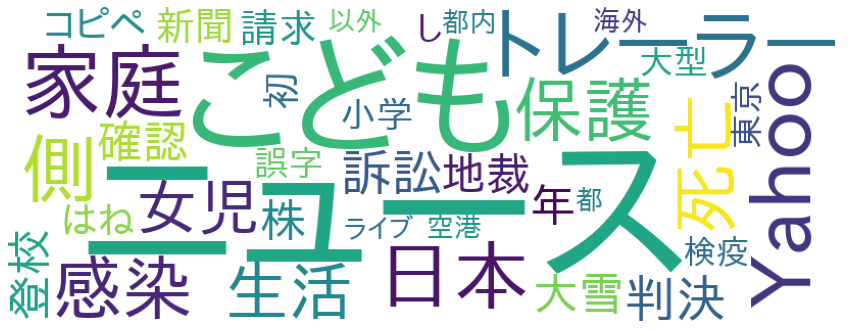

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random
import codecs
fpath = './fonts/IPAfont00303/ipagp.ttf'

def show_word_cloud(ws):
    # 前処理
    # 単語をスペースで区切った１文にする。
    # 出現回数分、appendしている。
    ws_show = []
    for i in range(len(ws)):
        word_times = ws[i][1]
        if word_times>0:
            for j in range(word_times):
                ws_show.append(ws[i][0])
    # 綺麗に整列してると、「あああ あああ」という単語と判断されるので、シャッフル
    random.shuffle(ws_show)
    # スペース区切りにする
    texts = ' '.join(ws_show)
    #print(texts)
    
    # 描画
    wc = WordCloud(background_color="white", font_path=fpath, 
                   width=820, height=312, regexp=r"[\w']+").generate(texts)
    plt.figure(figsize=(15,12))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

show_word_cloud(count.most_common(40))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12371 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12393 missing from current font.
  font.set_

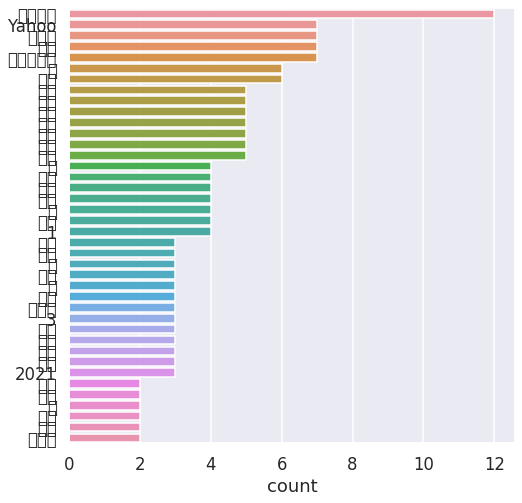

In [22]:
import seaborn as sns

sns.set(context='talk')
fig = plt.subplots(figsize=(8, 8))

sns.countplot(y=words, order=[i[0] for i in count.most_common(40)])